In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_auto = pd.read_csv('automobileEDA.csv')


In [3]:
#import the modules for liner regression
from sklearn.linear_model import LinearRegression

#create an object for linear regression
lm = LinearRegression()

In [6]:
# using highway-mpg for price prediction using linear regression
x = df_auto[['highway-mpg']]
y = df_auto['price']

In [8]:
#fitting of the linear model
lm.fit(x,y)

LinearRegression()

In [10]:
x

,highway-mpg
0,27
1,27
2,26
3,30
4,22
...,...
196,28
197,25
198,23
199,27


In [13]:
#output the prediction
Yhat = lm.predict(x)
Yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [14]:
df_auto.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [15]:
#value of  intercept
lm.intercept_

38423.305858157386

In [16]:
#value of slop
lm.coef_

array([-821.73337832])

<AxesSubplot:xlabel='highway-mpg', ylabel='price'>

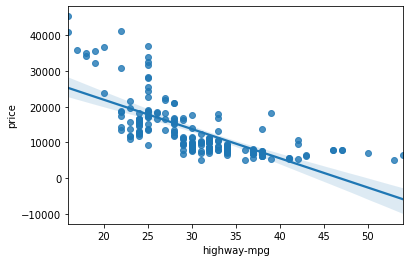

In [18]:
sns.regplot(x=df_auto['highway-mpg'], y=df_auto['price'], data=df_auto)

In [19]:
# train the model for engine size and price
lm1 = LinearRegression()
X = df_auto[['engine-size']]
Y = df_auto['price']

In [21]:
lm1.fit(X,Y)
yHat=lm1.predict(X)
yHat[0:5]

array([13728.4631336 , 13728.4631336 , 17399.38347881, 10224.40280408,
       14729.62322775])

In [22]:
lm1.intercept_

-7963.338906281049

In [23]:
lm1.coef_

array([166.86001569])

<AxesSubplot:xlabel='engine-size', ylabel='price'>

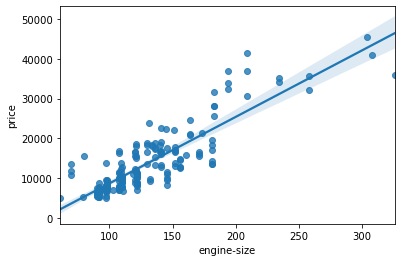

In [24]:
sns.regplot(x=df_auto['engine-size'], y=df_auto['price'], data=df_auto)

In [25]:
df_auto[['engine-size','price']].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


### Multiple Linear Regression

In [26]:
z = df_auto[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]


In [27]:
lm.fit(z,df_auto['price'])

LinearRegression()

In [32]:
yHat=lm.predict(z)
yHat.shape

(201,)

In [33]:
lm.intercept_

-15806.624626329198

In [34]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

In [38]:
a = df_auto[['normalized-losses','highway-mpg']]
lm2 = LinearRegression()
lm2.fit(a,df_auto['price'])
print(lm2.intercept_)
lm2.coef_

38201.31327245728


array([   1.49789586, -820.45434016])

(0.0, 48177.30889502236)

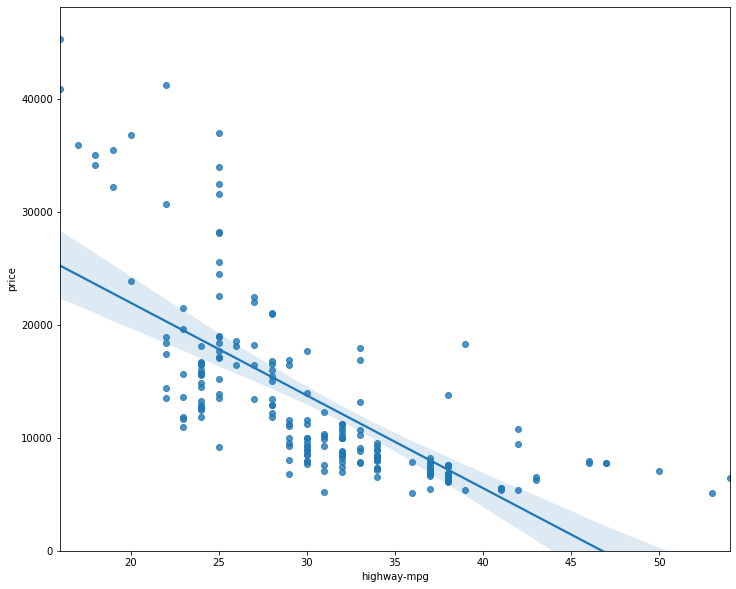

In [40]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df_auto)
plt.ylim(0,)

(0.0, 47414.1)

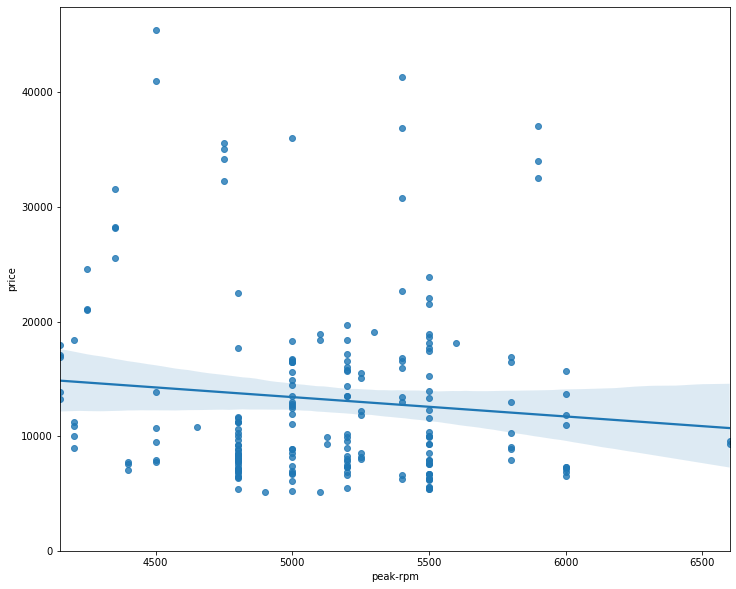

In [42]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df_auto)
plt.ylim(0,)

## Residual plot:-

C:\Users\Nirav\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


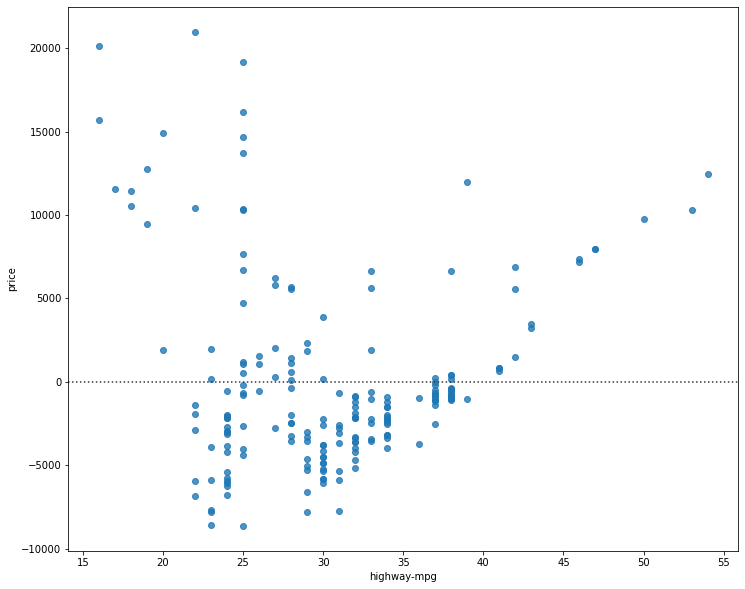

In [44]:
plt.figure(figsize=(12,10))
sns.residplot(df_auto['highway-mpg'],df_auto['price'])
plt.show()

In [45]:
Y_hat = lm.predict(z)

C:\Users\Nirav\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Nirav\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


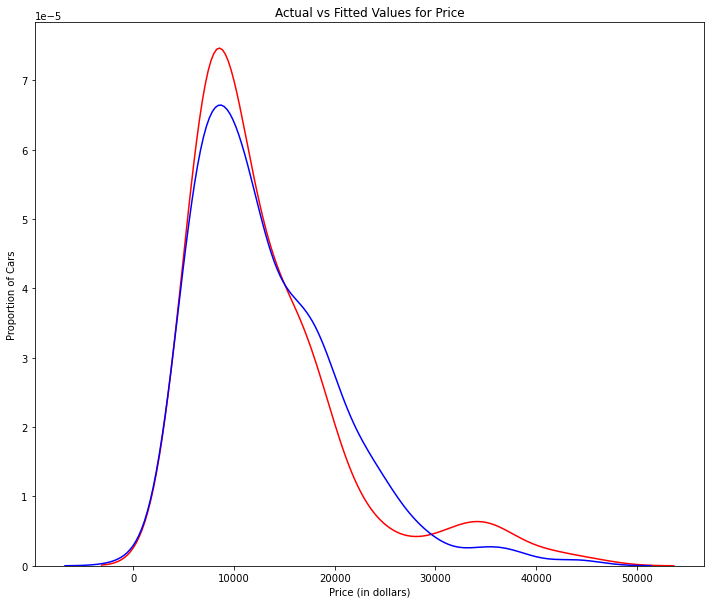

In [51]:
plt.figure(figsize=(width, height))


ax1 =sns.distplot(df_auto['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

In [53]:
x = df_auto['highway-mpg']
y = df_auto['price']

In [57]:
fit = np.polyfit(x,y,3)
plot = np.poly1d(fit)

In [58]:
print(plot)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


In [59]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

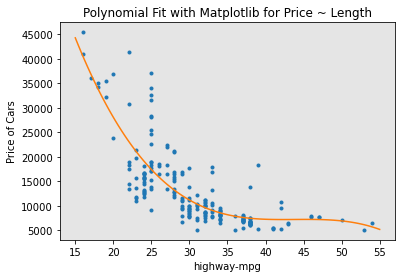

In [61]:
PlotPolly(plot, x, y, 'highway-mpg')

In [63]:
fit = np.polyfit(x,y,11)
plot = np.poly1d(fit)
print(plot)

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


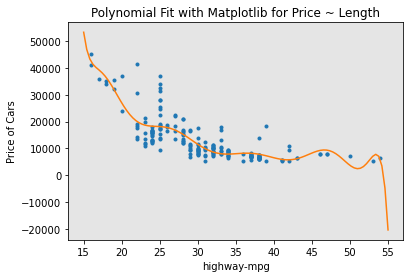

In [64]:
PlotPolly(plot,x,y,'highway-mpg')

In [65]:
from sklearn.preprocessing import PolynomialFeatures

In [66]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [70]:
z_pr=pr.fit_transform(z)

In [74]:
z

,horsepower,curb-weight,engine-size,highway-mpg
0,111.0,2548,130,27
1,111.0,2548,130,27
2,154.0,2823,152,26
3,102.0,2337,109,30
4,115.0,2824,136,22
...,...,...,...,...
196,114.0,2952,141,28
197,160.0,3049,141,25
198,134.0,3012,173,23
199,106.0,3217,145,27


In [77]:
z_pr[0:5]

array([[1.000000e+00, 1.110000e+02, 2.548000e+03, 1.300000e+02,
        2.700000e+01, 1.232100e+04, 2.828280e+05, 1.443000e+04,
        2.997000e+03, 6.492304e+06, 3.312400e+05, 6.879600e+04,
        1.690000e+04, 3.510000e+03, 7.290000e+02],
       [1.000000e+00, 1.110000e+02, 2.548000e+03, 1.300000e+02,
        2.700000e+01, 1.232100e+04, 2.828280e+05, 1.443000e+04,
        2.997000e+03, 6.492304e+06, 3.312400e+05, 6.879600e+04,
        1.690000e+04, 3.510000e+03, 7.290000e+02],
       [1.000000e+00, 1.540000e+02, 2.823000e+03, 1.520000e+02,
        2.600000e+01, 2.371600e+04, 4.347420e+05, 2.340800e+04,
        4.004000e+03, 7.969329e+06, 4.290960e+05, 7.339800e+04,
        2.310400e+04, 3.952000e+03, 6.760000e+02],
       [1.000000e+00, 1.020000e+02, 2.337000e+03, 1.090000e+02,
        3.000000e+01, 1.040400e+04, 2.383740e+05, 1.111800e+04,
        3.060000e+03, 5.461569e+06, 2.547330e+05, 7.011000e+04,
        1.188100e+04, 3.270000e+03, 9.000000e+02],
       [1.000000e+00, 1.1500

In [73]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [78]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [79]:
Input

[('scale', StandardScaler()),
 ('polynomial', PolynomialFeatures(include_bias=False)),
 ('model', LinearRegression())]

In [80]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [81]:
z = z.astype(float)
pipe.fit(z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [82]:
ypipe=pipe.predict(z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

In [83]:
Input=[('scale',StandardScaler()),('model',LinearRegression())]

pipe=Pipeline(Input)

pipe.fit(z,y)

ypipe=pipe.predict(z)
ypipe[0:10]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])

In [85]:
x = df_auto[['highway-mpg']]
y = df_auto['price']

In [86]:
lm.fit(x,y)
lm.score(x,y)

0.4965911884339175